In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models

print(tf.__version__)


2.7.0


In [23]:
from data_processing import import_and_clean_train, label_encoding

train_X, test_X, train_y, test_y, labels_dict = import_and_clean_train('train', label_encoding)

# train_X.pop('Id')
# test_X.pop('Id')

train_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition
0,20,3,65.0,7800,1,3,3,0,4,0,...,4,4,2,64,0,0,0,0,8,4
1,50,4,51.0,6120,1,3,3,0,4,0,...,1,4,2,90,0,205,0,0,8,0
2,20,3,90.0,12378,1,0,3,0,4,0,...,4,4,2,208,175,0,0,0,8,4
3,20,3,70.0,7420,1,3,3,0,4,0,...,4,4,2,0,0,0,0,0,8,4
4,50,4,52.0,9439,1,3,3,0,4,0,...,1,1,2,0,0,192,0,0,8,4


Preprocessing: defining the normalizer and adapting it to the train set:

In [27]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_X))

# gr = np.array(train_X['GrLivArea'])
# gr_normalizer = tf.keras.layers.Normalization(axis=-1)
# gr_normalizer.adapt(gr)
# print(normalizer.mean.numpy())

# train_X = normalizer(train_X)
# test_X = normalizer(test_X)

# train_X.head()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Function to plot the loss (mean absolute error) at each epoch:

In [28]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 200000])
    plt.xlabel('Epoch')
    plt.ylabel('Error [SalePrice]')
    plt.legend()
    plt.grid(True)

Function to train and evaluate a model which layers are defined outside it:

In [21]:
def train_and_evaluate(model, train_x, train_y, val_x, val_y, epochs=100):

    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

    history = model.fit(x=train_X, y=train_y, validation_data=(val_x, val_y), verbose=0, epochs=epochs)

    plot_loss(history)

Preliminary model:

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

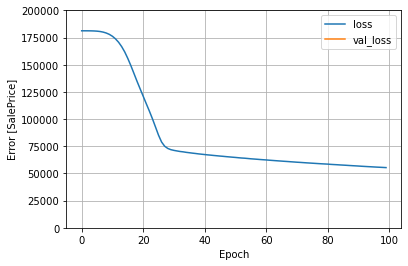

In [20]:
model = models.Sequential()
# model.add(normalizer)
model.add(layers.Dense(units=1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

train_and_evaluate(model, train_X, train_y, test_X, test_y, epochs=100)

Function to build and compile with layers defined inside it:

In [37]:
def build_and_compile_model(norm):
    model = keras.Sequential([
    norm,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.01))
    return model


We use this function to build an exploratory model which uses only our training data for the training and validation.

In [35]:
dnn_model = build_and_compile_model(normalizer)

dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normalizat  (None, 67)               135       
 ion)                                                            
                                                                 
 dense_19 (Dense)            (None, 64)                4352      
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,712
Trainable params: 8,577
Non-trainable params: 135
_________________________________________________________________


Results of the preliminary model:

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

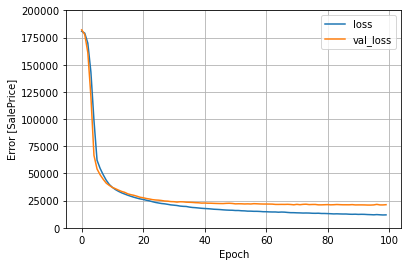

In [36]:
history = dnn_model.fit(
    train_X,
    train_y,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

The plot functions below will be used for the evaluation and improvement, they still have to be properly incorporated.

In [33]:
display(test_predictions)

a = plt.axes(aspect='equal')
plt.scatter(test_y, test_predictions)
plt.xlabel('True Values [SalePrice]')
plt.ylabel('Predictions [SalePrice]')
lims = [0, 900000000000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


NameError: name 'test_predictions' is not defined

In [ ]:
error = test_predictions - test_y
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [SalePrice]')
_ = plt.ylabel('Count')